<a href="https://colab.research.google.com/github/lameessa/IT326-project-depression/blob/main/Copy_of_Phase_2_notebook_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Data

#### Sample:

In [603]:
import pandas as pd
df = pd.read_csv('b_depressed.csv')


In [604]:
# Filter the data
depressed_ones = df[df['depressed'] == 1]
depressed_zeros = df[df['depressed'] == 0]

# Calculate remaining sample size
remaining_sample_size = 500 - len(depressed_ones)

# Ensure we're not oversampling
if remaining_sample_size > len(depressed_zeros):
    remaining_sample_size = len(depressed_zeros)

# Sample from the non-depressed group
depressed_zeros_sample = depressed_zeros.sample(n=remaining_sample_size, random_state=42)

# Combine the two groups
sample = pd.concat([depressed_ones, depressed_zeros_sample], ignore_index=True)

# Display the sample
display(sample)

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
1,849,130,0,34,0,1,9,3,41303144,21925041,...,0,0,0,0,26692283,22243569,0,22562288,55608922.0,1
2,540,52,1,84,0,0,1,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
3,603,100,1,56,1,0,12,2,93596368,21140288,...,0,1,0,0,43775349,77808008,0,12402556,71201668.0,1
4,1001,207,1,40,0,0,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,1104,100,1,25,1,3,10,5,12390944,29308127,...,0,0,1,1,40038424,86749923,0,37113522,11464336.0,0
496,413,57,1,40,1,6,7,9,34766083,12540034,...,0,0,0,0,36034582,29361513,1,16865457,32964969.0,0
497,1229,79,1,19,1,1,10,3,2581633,21780904,...,1,0,0,0,26692283,35589713,1,48558154,83635817.0,0
498,682,59,1,22,1,1,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


#### Duplicates:

This code confirms that the dataset has no rows that are identical copies of other rows based on all columns.

In [605]:
duplicates_sum = sample.duplicated().sum()
print(duplicates_sum)

0


#### Missing values:

We have 10 missing values in no_lasting_investmen column:

In [606]:
missing_values = sample.isna().sum()
print(missing_values)

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     10
depressed                 0
dtype: int64


#### Statistical Summary:
##### Show the Min, Q1, Q2, Q3, and the Max for each numeric Attribute:
###### Using summary_stats function:
- Age: The ages range from 17 to 87 years, with an average of 35.45 years. The distribution is centered around younger individuals, with 50% of the population between 25 and 42 years old.

- Number of Children: On average, individuals have about 2.91 children, with the number of children ranging from 0 to 11. Half of the population has between 2 and 4 children.

- Total Members: The average household has about 5 members. 50% of households consist of 4 to 6 members, indicating a tendency toward larger families.

- Gained Asset: The average gained asset value is about 33.8 million, with a standard deviation of 19.77 million. The values range from 325,112 to 98.44 million.

- Durable Asset: The mean value of durable assets is approximately 26.88 million, ranging from 172,966 to 99.46 million.

- Save Asset: Savings assets have an average value of 26.82 million, with a range from 1.24 million to 99.60 million.

- Living Expenses: The average annual living expenses are 31.57 million, with values ranging from 1.13 million to 96.09 million.

- Other Expenses: Other expenses average 34.10 million, with values ranging from 172,966 to 98.97 million.

- Incoming Agricultural: The average agricultural income is 33.34 million, with values ranging from 1.04 million to 99.79 million.

- Farm Expenses: Farming-related expenses average 34.91 million, with a range from 1.09 million to 98.29 million.

- Lasting Investment: Long-term investments average 32.60 million, ranging from 74,292 to 99.45 million.

- No Lasting Investment: The average value for no lasting investment is 33.99 million, ranging from 126,312 to 96.76 million.


In [607]:
specific_columns = sample[['Age', 'Number_children', 'total_members', 'gained_asset', 'durable_asset', 'save_asset', 'living_expenses', 'other_expenses', 'incoming_agricultural', 'farm_expenses', 'lasting_investment', 'no_lasting_investmen']]
summary_stats = specific_columns.describe()
display(summary_stats)

,Age,Number_children,total_members,gained_asset,durable_asset,save_asset,living_expenses,other_expenses,incoming_agricultural,farm_expenses,lasting_investment,no_lasting_investmen
count,500.000000,500.000000,500.000000,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,5.000000e+02,4.900000e+02
mean,35.446000,2.914000,5.014000,3.380363e+07,2.687948e+07,2.682284e+07,3.157170e+07,3.410388e+07,3.334108e+07,3.491007e+07,3.259559e+07,3.398763e+07
std,14.618704,1.926142,1.757265,1.977213e+07,1.794758e+07,1.681546e+07,2.133508e+07,2.246038e+07,1.972390e+07,2.046501e+07,2.161435e+07,2.094565e+07
min,17.000000,0.000000,1.000000,3.251120e+05,1.729660e+05,1.242339e+06,1.134422e+06,1.729660e+05,1.040999e+06,1.096608e+06,7.429200e+04,1.263120e+05
25%,25.000000,2.000000,4.000000,2.478189e+07,1.927850e+07,2.339998e+07,1.938193e+07,2.110025e+07,2.232142e+07,2.278020e+07,1.989384e+07,2.364352e+07
50%,31.000000,3.000000,5.000000,2.891220e+07,2.286194e+07,2.339998e+07,2.669228e+07,2.820307e+07,3.002882e+07,3.136343e+07,2.841172e+07,2.829271e+07
75%,42.000000,4.000000,6.000000,3.639359e+07,2.437539e+07,2.339998e+07,3.069613e+07,4.244073e+07,3.603458e+07,4.006623e+07,3.646133e+07,4.134523e+07
max,87.000000,11.000000,12.000000,9.844437e+07,9.945544e+07,9.960110e+07,9.609222e+07,9.897499e+07,9.978910e+07,9.828510e+07,9.944667e+07,9.675953e+07


#### The Variance:

##### - Low Variance Attributes:
Age, Number of Children, and Total Members: These attributes show similar values across individuals, suggesting that the group is quite uniform in terms of demographics. Most people in this dataset have comparable ages, numbers of children, and household sizes.
##### - High Variance Attributes:
Gained Asset, Durable Asset, Save Asset, Living Expenses, Other Expenses, Incoming Agricultural, Farm Expenses, Lasting Investment, and No Lasting Investment: These attributes exhibit a wide range of values, indicating significant differences in financial situations among individuals. This means that while some people have substantial wealth and savings, others may struggle financially or have very little in terms of assets and investments.

In [608]:
variance = specific_columns.var()
print(variance);

Age                      2.137065e+02
Number_children          3.710024e+00
total_members            3.087980e+00
gained_asset             3.909371e+14
durable_asset            3.221157e+14
save_asset               2.827595e+14
living_expenses          4.551856e+14
other_expenses           5.044684e+14
incoming_agricultural    3.890321e+14
farm_expenses            4.188168e+14
lasting_investment       4.671803e+14
no_lasting_investmen     4.387204e+14
dtype: float64


## Graphs & Tables

##### The pie chart shows the distribution of people classified as “Depressed” and “Not Depressed.”

 According to the chart, 47.6% of individuals are depressed, while the remaining 52.4% are not depressed.
 This gives a quick overview of the proportions of depressed versus non-depressed individuals in the dataset.


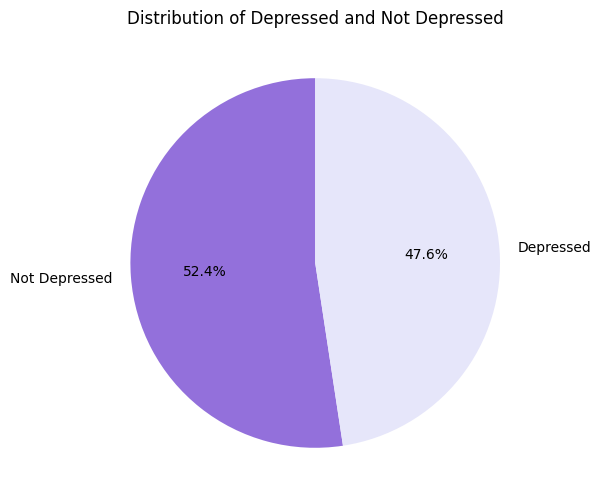

In [609]:
import matplotlib.pyplot as plt
depressed_counts = sample['depressed'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(depressed_counts, labels=['Not Depressed', 'Depressed'], autopct='%1.1f%%', startangle=90, colors=['MediumPurple', 'lavender'])
plt.title('Distribution of Depressed and Not Depressed')
plt.show()

##### Using a boxplot
We observed the distribution of education levels for two groups: "Not Depressed" (label 0) and "Depressed" (label 1). The y-axis represents education level, and the x-axis shows the class labels. The median education level is slightly higher in the "Depressed" group, though both groups have a similar spread. There are more outliers in the "Not Depressed" group at the lower end of the education level.

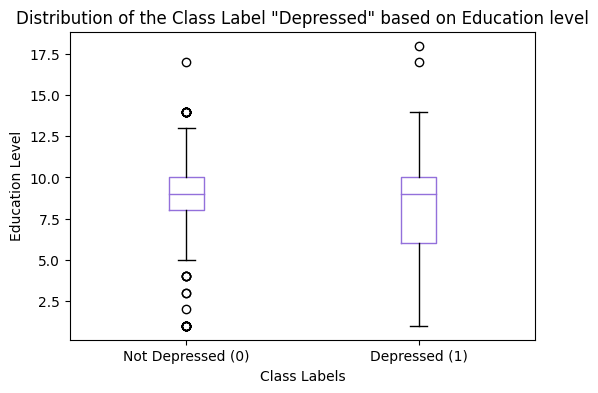

In [610]:

plt.figure(figsize=(6, 4))
plt.boxplot([sample[sample['depressed'] == 0]['education_level'], sample[sample['depressed'] == 1]['education_level']],
            labels=['Not Depressed (0)', 'Depressed (1)'],
            boxprops=dict(color='mediumpurple'),  # Change box color to medium purple
            medianprops=dict(color='mediumpurple')  # Change median line color to medium purple
           )
plt.title('Distribution of the Class Label "Depressed" based on Education level')
plt.ylabel('Education Level')
plt.xlabel('Class Labels')
plt.show()


##### Using a Pie Chart to show the Relationship Between Marriage and Depression
The pie chart shows the relationship between marriage and depression. It indicates that 71.4% of depressed individuals are married.

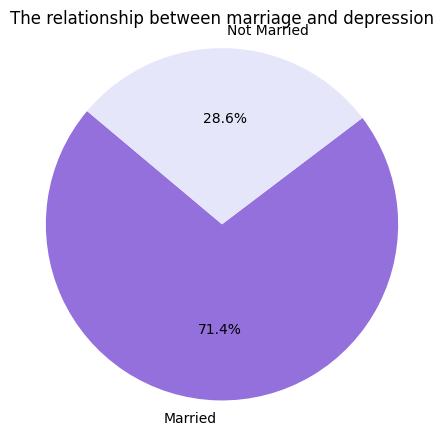

In [611]:
depressed_sample = sample[sample['depressed'] == 1]
marriage_count = depressed_sample['Married'].value_counts()
labels = ['Married' if val == 1 else 'Not Married' for val in marriage_count.index]
plt.figure(figsize=(5, 5))
plt.pie(marriage_count, labels=labels, autopct='%1.1f%%', startangle=140, colors=['MediumPurple', 'lavender'])
plt.title('The relationship between marriage and depression')
plt.axis('equal')
plt.show()


##### The bar chart shows the relationship between the number of children and depression status.
It highlights that people with no children or two children appear most often in both the "Depressed" and "Not Depressed" groups. However, as the number of children increases beyond two, more individuals fall into the "Not Depressed" category. More analysis is needed to understand this relationship fully.

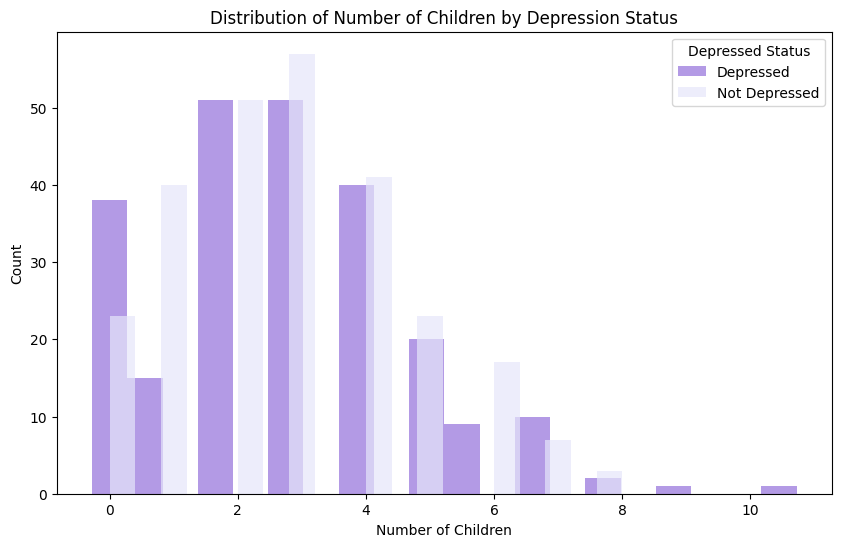

In [612]:
plt.figure(figsize=(10, 6))
plt.hist(sample[sample['depressed'] == 1]['Number_children'], bins=20, alpha=0.7, color='MediumPurple', label='Depressed', align='left', rwidth=1)
plt.hist(sample[sample['depressed'] == 0]['Number_children'], bins=20, alpha=0.7, color='lavender', label='Not Depressed', align='mid', rwidth=1)
plt.title('Distribution of Number of Children by Depression Status')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.legend(title='Depressed Status')
plt.show()

#### The bar chart shows the distribution of age by depression status.
In this chart, the "Not Depressed" group is more prevalent across all age ranges, with the highest concentrations appearing in individuals in their 20s and early 30s. In contrast, the "Depressed" group has fewer individuals across the entire age spectrum, though it tends to follow a similar pattern to the "Not Depressed" group, with a higher count in the 20s age range. Further analysis is required to understand the underlying factors contributing to the distribution of depression status across different ages.

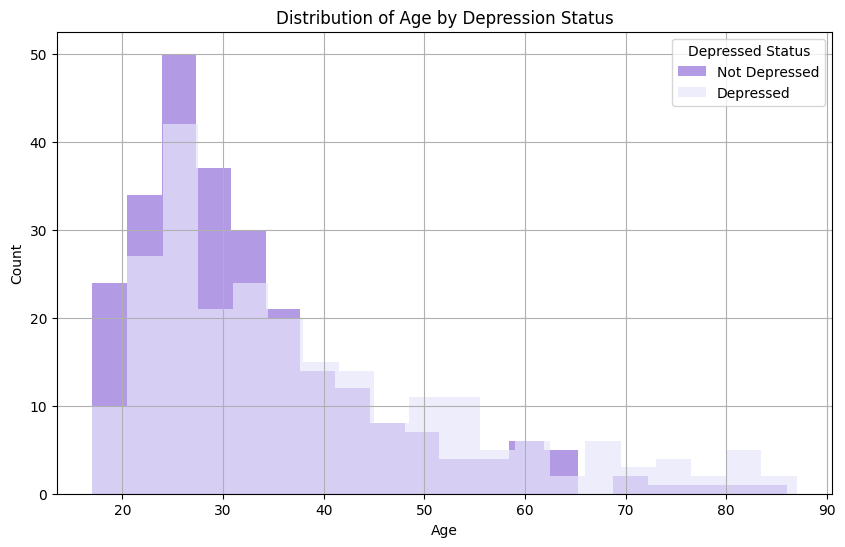

In [613]:
plt.figure(figsize=(10,6))
sample[sample['depressed'] == 0]['Age'].hist(bins=20,color='MediumPurple', alpha=0.7, label='Not Depressed')
sample[sample['depressed'] == 1]['Age'].hist(bins=20,color='lavender', alpha=0.7, label='Depressed')
plt.title('Distribution of Age by Depression Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Depressed Status')
plt.show()

## Pre-Processing:

### Data cleaning:

#### Handling Missing Values
- Show the rows and columns containing the missing values:

In [614]:
missing_values = sample.isna()
missing_counts = missing_values.sum();
rows_with_missing = sample[sample.isna().any(axis=1)];

print("Missing values in each column:");
print(missing_counts);
print("\nRows with missing values:");
display(rows_with_missing);

Missing values in each column:
Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     10
depressed                 0
dtype: int64

Rows with missing values:


,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
49,571,69,1,70,1,3,6,7,36763528,13132603,...,0,1,0,0,30028818,31363432,0,53099207,NaN,1
176,1211,62,1,29,1,1,10,3,48880596,97853912,...,1,0,0,0,30028818,31363432,1,15009773,NaN,1
226,1074,97,1,77,0,0,4,1,28912201,22861940,...,0,0,0,0,30028818,31363432,0,24781887,NaN,1
302,685,114,1,25,1,1,7,3,28912201,25224208,...,1,0,0,0,30028818,31363432,1,31149896,NaN,0
336,804,150,1,72,0,0,5,1,28912201,80076847,...,0,0,0,0,30028818,31363432,0,80076847,NaN,0
344,637,21,1,55,1,0,1,2,34766083,61659176,...,1,0,0,0,30028818,31363432,1,10283141,NaN,0
366,673,38,1,25,0,1,11,2,28912201,48846878,...,0,0,0,0,30028818,31363432,0,54452259,NaN,0
369,556,81,1,21,1,5,10,7,28912201,34433044,...,1,0,0,0,30028818,31363432,1,3683535,NaN,0
380,491,82,1,86,0,0,1,1,82606287,11531066,...,0,0,0,0,30028818,31363432,0,25397076,NaN,0
412,47,5,1,18,1,2,10,3,28912201,14894295,...,1,0,0,0,30028818,31363432,1,18577829,NaN,0


This shows that there's 10 missing values in no_lasting_investmen column.

- Filling the missing values with the mean.

In [615]:
# Create a new copy of the sample for further preprocessing
sample_preprocessed = sample.copy()

mean_value = sample_preprocessed['no_lasting_investmen'].mean()

sample_preprocessed['no_lasting_investmen'] = sample_preprocessed['no_lasting_investmen'].fillna(value=mean_value)

missing_values = sample_preprocessed.isnull().sum()
print('Missing values per column:')
print(missing_values)
sample_preprocessed.to_csv('Cleaned_dataset.csv', index=False)

Missing values per column:
Survey_id                0
Ville_id                 0
sex                      0
Age                      0
Married                  0
Number_children          0
education_level          0
total_members            0
gained_asset             0
durable_asset            0
save_asset               0
living_expenses          0
other_expenses           0
incoming_salary          0
incoming_own_farm        0
incoming_business        0
incoming_no_business     0
incoming_agricultural    0
farm_expenses            0
labor_primary            0
lasting_investment       0
no_lasting_investmen     0
depressed                0
dtype: int64


This shows that we handled all missing values.

#### Outlier Detection and Removal

This section implements the Interquartile Range (IQR) method to detect and visualize outliers in the specified attributes of the dataset.


In [616]:

def detect_outliers_iqr(sample_preprocessed, column):
    Q1 = sample_preprocessed[column].quantile(0.25)
    Q3 = sample_preprocessed[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return sample_preprocessed[(sample_preprocessed[column] < lower_bound) | (sample_preprocessed[column] > upper_bound)]

# Initialize a set to store the indices of rows with outliers
rows_with_outliers = set()

# Show the number of rows with outliers in each numeric column
for col in sample_preprocessed.select_dtypes(include=['number']).columns:  # Only loop through numeric columns
    outliers = detect_outliers_iqr(sample_preprocessed, col)
    num_outliers = outliers.shape[0]  # Get the number of rows with outliers
    print(f"Count of outliers in '{col}': {num_outliers}")

    # Add the indices of rows with outliers to the set
    rows_with_outliers.update(outliers.index)

# Show the total number of unique rows with outliers
total_rows_with_outliers = len(rows_with_outliers)
print(f"\nTotal rows with outliers: {total_rows_with_outliers}")


Count of outliers in 'Survey_id': 0
Count of outliers in 'Ville_id': 23
Count of outliers in 'sex': 42
Count of outliers in 'Age': 23
Count of outliers in 'Married': 0
Count of outliers in 'Number_children': 7
Count of outliers in 'education_level': 41
Count of outliers in 'total_members': 10
Count of outliers in 'gained_asset': 86
Count of outliers in 'durable_asset': 132
Count of outliers in 'save_asset': 158
Count of outliers in 'living_expenses': 104
Count of outliers in 'other_expenses': 43
Count of outliers in 'incoming_salary': 92
Count of outliers in 'incoming_own_farm': 125
Count of outliers in 'incoming_business': 38
Count of outliers in 'incoming_no_business': 112
Count of outliers in 'incoming_agricultural': 64
Count of outliers in 'farm_expenses': 57
Count of outliers in 'labor_primary': 108
Count of outliers in 'lasting_investment': 59
Count of outliers in 'no_lasting_investmen': 54
Count of outliers in 'depressed': 0

Total rows with outliers: 379


In [617]:
# Function to cap outliers using the IQR method with adjustable threshold
def cap_outliers_iqr(df, multiplier=1.5):
    for column in df.select_dtypes(include=['number']).columns:  # Loop through numeric columns only
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        # Cap the values that are lower than the lower bound
        df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else x)

        # Cap the values that are higher than the upper bound
        df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else x)

# Apply outlier capping with IQR method and adjustable multiplier
cap_outliers_iqr(sample_preprocessed, iqr_multiplier)

# After capping the outliers, check the shape of the cleaned data
print(f"Data shape after capping outliers: {sample_preprocessed.shape}")

# Save the updated DataFrame to a CSV file
sample_preprocessed.to_csv('Cleaned_dataset_iqr.csv', index=False)



Data shape after capping outliers: (500, 23)


In [618]:
 # Show the number of rows with outliers in each numeric column after handling
print("\nNumber of rows with outliers after capping:")
for col in sample_preprocessed.select_dtypes(include=['number']).columns:  # Loop through numeric columns only
    outliers = detect_outliers_iqr(sample_preprocessed, col)
    num_outliers = outliers.shape[0]  # Get the number of rows with outliers
    print(f"Count of outliers in '{col}': {num_outliers}")

# Save the updated DataFrame to a CSV file
sample_preprocessed.to_csv('Cleaned_dataset.csv', index=False)


Number of rows with outliers after capping:
Count of outliers in 'Survey_id': 0
Count of outliers in 'Ville_id': 0
Count of outliers in 'sex': 0
Count of outliers in 'Age': 0
Count of outliers in 'Married': 0
Count of outliers in 'Number_children': 0
Count of outliers in 'education_level': 0
Count of outliers in 'total_members': 0
Count of outliers in 'gained_asset': 0
Count of outliers in 'durable_asset': 0
Count of outliers in 'save_asset': 0
Count of outliers in 'living_expenses': 0
Count of outliers in 'other_expenses': 0
Count of outliers in 'incoming_salary': 0
Count of outliers in 'incoming_own_farm': 125
Count of outliers in 'incoming_business': 0
Count of outliers in 'incoming_no_business': 0
Count of outliers in 'incoming_agricultural': 0
Count of outliers in 'farm_expenses': 0
Count of outliers in 'labor_primary': 0
Count of outliers in 'lasting_investment': 0
Count of outliers in 'no_lasting_investmen': 0
Count of outliers in 'depressed': 0


### Data transformation:

#### Aggregation of Total Assets and Total Expenses

In this section, the attributes 'gained_asset', 'durable_asset', and 'save_asset' are aggregated to create the 'total_assets' variable, while 'living_expenses', 'farm_expenses' and 'other_expenses' are combined to form the 'total_expenses' variable. This transformation simplifies the dataset by reducing the number of features and providing a clearer overview of an individual's overall financial status. The resulting aggregated values enhance interpretability and facilitate more efficient analysis within the dataset.


In [619]:
# Aggregate gained_asset, durable_asset, and save_asset into total_assets
sample_preprocessed['total_assets'] = sample_preprocessed[['gained_asset', 'durable_asset', 'save_asset']].sum(axis=1)

# Aggregate living_expenses and other_expenses into total_expenses
sample_preprocessed['total_expenses'] = sample_preprocessed[['living_expenses', 'other_expenses', 'farm_expenses']].sum(axis=1)

# Drop the original columns that were aggregated
sample_preprocessed.drop(columns=['gained_asset', 'durable_asset', 'save_asset', 'living_expenses', 'other_expenses','farm_expenses'], inplace=True)

# Display the updated DataFrame
print("Updated Data with Aggregated Columns:")
display(sample_preprocessed[['total_assets', 'total_expenses']])  # Show the first few rows for verification

# Save the updated DataFrame to 'Cleaned_dataset.csv'
sample_preprocessed.to_csv('Cleaned_dataset.csv', index=False)




Updated Data with Aggregated Columns:


,total_assets,total_expenses
0,75174120.00,8.625878e+07
1,86628164.00,8.080144e+07
2,75174120.00,8.625878e+07
3,98351402.75,1.730313e+08
4,75174120.00,8.625878e+07
...,...,...
495,65099050.00,9.667305e+07
496,70706096.00,8.824469e+07
497,52545220.75,9.853012e+07
498,75174120.00,8.625878e+07


#### Normalization of Total Assets and Total Expenses

In this section, Min-Max normalization is applied to the `total_assets` and `total_expenses` variables. This technique rescales the values to a range between 0 and 1, facilitating comparisons between these financial metrics. By transforming the data in this way, we ensure that both attributes are on a consistent scale, which is essential for many machine learning algorithms and statistical analyses. This normalization process enhances the interpretability of the data and mitigates the influence of extreme values.


In [620]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns for normalization
columns_to_normalize = ['total_assets', 'total_expenses',
                         'incoming_agricultural',
                         'lasting_investment', 'no_lasting_investmen']

# Normalize the specified columns using MinMaxScaler
scaler = MinMaxScaler()
sample_preprocessed[columns_to_normalize] = scaler.fit_transform(sample_preprocessed[columns_to_normalize])

# Round the normalized values to 8 decimal places
sample_preprocessed[columns_to_normalize] = sample_preprocessed[columns_to_normalize].round(8)

# Display the normalized DataFrame with rounded values
print("Normalized Data:")
display(sample_preprocessed[columns_to_normalize])

# Save the updated DataFrame to 'Cleaned_dataset.csv'
sample_preprocessed.to_csv('Cleaned_dataset.csv', index=False)



Normalized Data:


,total_assets,total_expenses,incoming_agricultural,lasting_investment,no_lasting_investmen
0,0.490416,0.400710,0.515511,0.462741,0.428019
1,0.661796,0.368600,0.454684,0.367221,0.843119
2,0.490416,0.400710,0.515511,0.462741,0.428019
3,0.837203,0.911257,0.766119,0.201316,1.000000
4,0.490416,0.400710,0.515511,0.462741,0.428019
...,...,...,...,...,...
495,0.339669,0.461985,0.697993,0.604838,0.172294
496,0.423564,0.412394,0.625000,0.274194,0.499019
497,0.151834,0.472911,0.454684,0.791725,1.000000
498,0.490416,0.400710,0.515511,0.462741,0.428019


#### Age Discretization:

In this section, the `Age` attribute is discretized into three distinct categories: 'Youth', 'Adult', and 'Senior'. This transformation simplifies the analysis by grouping individuals based on age ranges. The defined age ranges are as follows:
- **Youth**: Ages 0 to 24
- **Adult**: Ages 25 to 59
- **Senior**: Ages 60 and above


In [621]:

print("The age after discretization")

# Divide ages into categories
age_bins = [0, 25, 60, sample_preprocessed['Age'].max()]  # Age intervals for discretization
age_labels = ['Youth', 'Adult', 'Senior']  # Age group labels

# Replace values in the 'Age' column with the corresponding age group labels
sample_preprocessed['Age'] = pd.cut(sample_preprocessed['Age'], bins=age_bins, labels=age_labels, include_lowest=True)

# Display the first 5 rows and last 5 rows while preserving the original indexes
first_five = sample_preprocessed[['Age']].head()
last_five = sample_preprocessed[['Age']].tail()

# Merge the data with a "..." row in the middle to maintain the original order
summary_sample = pd.concat([first_five,
                            pd.DataFrame([['...']], columns=['Age'], index=['...']),
                            last_five])

# Display the summarized table with the original indexes
display(summary_sample)

# Save the updated DataFrame to 'Cleaned_dataset.csv'
sample_preprocessed.to_csv('Cleaned_dataset.csv', index=False)


The age after discretization


,Age
0,Youth
1,Adult
2,Senior
3,Adult
4,Adult
...,...
495,Youth
496,Adult
497,Youth
498,Youth


## Feature Selection:
This code temporarily fills missing values (NaN) with the mean of each column to calculate the correlation between features and the target variable depressed. It then computes the absolute correlation of each feature with the target and selects the top 5 features based on their correlation. Finally, it visualizes these top features using a bar plot, but the original dataset remains unchanged as the filling is only done for the correlation calculation.

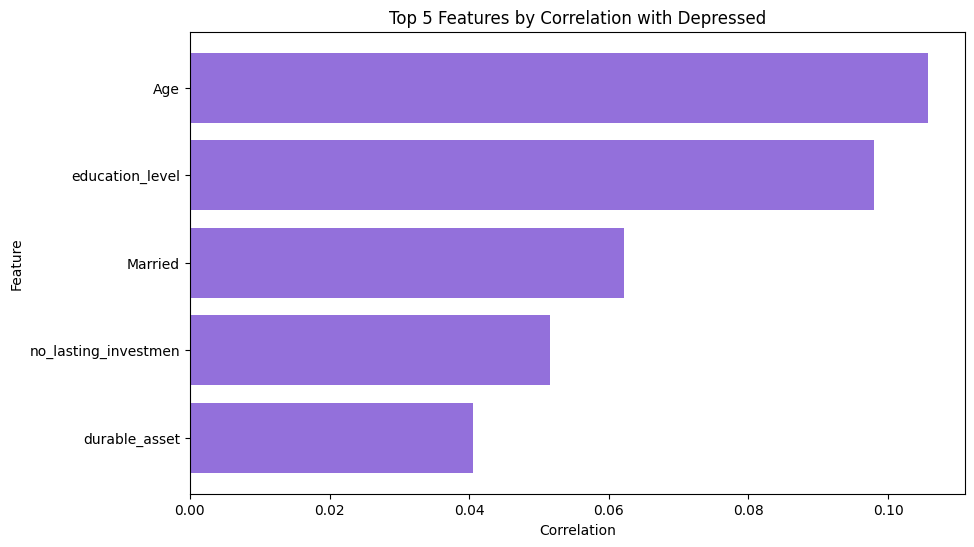

In [622]:
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Load the original dataset
data = pd.read_csv('b_depressed.csv')

# Define features (X) and target variable (y)
X = data.drop('depressed', axis=1)  # Dropping the target variable
y = data['depressed']

# Temporarily fill NaN values with the mean of each column only for correlation calculation
X_temp = X.fillna(X.mean())

# Calculate the correlation of each feature with the target variable
correlations = X_temp.corrwith(y).abs()  # Using abs() to get the absolute value of the correlation

# Create a DataFrame for better visualization
correlation_scores = pd.DataFrame({'Feature': correlations.index, 'Correlation': correlations.values})

# Sort the features by their absolute correlation and get the top 5
top_5_features = correlation_scores.nlargest(5, 'Correlation')

# Plot the top 5 features
plt.figure(figsize=(10, 6))
plt.barh(top_5_features['Feature'], top_5_features['Correlation'], color='mediumpurple')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.title('Top 5 Features by Correlation with Depressed')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()
